AUTHOR:         
marwa Osman: marwaosman9975@gmail.com    

👉 [LinkedIn](https://www.linkedin.com/in/marwa-osman-00190b222/)

👉 [GitHub](https://github.com/marwa9975)

# CUSTOMER CHURN PREDICTION

## Project Description

In this project, I aim to build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. I will use a dataset from the UCI Machine Learning Repository, which contains information such as age, job, marital status, education, balance, and various other features about the customers. The goal is to develop a predictive model that can assist marketing efforts by identifying potential customers who are more likely to make a purchase

## Business Understanding


The project is important for businesses, especially in the marketing and sales domain, as it can help in targeting potential customers more effectively. By identifying customers who are likely to make a purchase, businesses can optimize their marketing strategies, allocate resources efficiently, and ultimately increase their conversion rates and revenue.

## Data Understanding

The dataset i obtained from UCI Machine Learning Repository website: [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)  
 
The dataset contains the following columns:    

``age``: Age of the customer.   
``job``: Occupation of the customer.    
``marital``: Marital status of the customer.     
``education``: Education level of the customer.  
``default``: Whether the customer has credit in default (yes/no).  
``balance``: Average yearly balance in euros.   
``housing``: Whether the customer has a housing loan (yes/no).  
``loan``: Whether the customer has a personal loan (yes/no).   
``contact``: Type of communication used to contact the customer.  
``day``: Last contact day of the month.   
``month``: Last contact month of the year.   
``duration``: Duration of the last contact in seconds.   
``campaign``: Number of contacts performed during this campaign.   
``pdays``: Number of days since the customer was last contacted.   
``previous``: Number of contacts performed before this campaign.   
``poutcome``: Outcome of the previous marketing campaign.   
``y``: Whether the customer subscribed to a term deposit (yes/no).    

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 



In [30]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
    
    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts
    

In [31]:
# load the data
bank = pd.read_csv('bank.csv', delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [32]:
# Initialize the DataUnderstanding class
du = DataUnderstanding(bank)

In [33]:
# Get the summary statistics
du.get_summary_statistics()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [34]:
# get summary of the data
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The data contains 4521 entries and 17 columns

In [35]:
# Get data types
du.get_dtypes()

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Data Preparation

#### Check for missing values

In [36]:
# Check for missing values
du.get_missing_values()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no missing data

In [37]:
# get value counts
du.get_value_counts()

{'age': 34    231
 32    224
 31    199
 36    188
 33    186
      ... 
 68      2
 87      1
 81      1
 86      1
 84      1
 Name: age, Length: 67, dtype: int64,
 'job': management       969
 blue-collar      946
 technician       768
 admin.           478
 services         417
 retired          230
 self-employed    183
 entrepreneur     168
 unemployed       128
 housemaid        112
 student           84
 unknown           38
 Name: job, dtype: int64,
 'marital': married     2797
 single      1196
 divorced     528
 Name: marital, dtype: int64,
 'education': secondary    2306
 tertiary     1350
 primary       678
 unknown       187
 Name: education, dtype: int64,
 'default': no     4445
 yes      76
 Name: default, dtype: int64,
 'balance': 0       357
 2        24
 1        15
 4        13
 5        11
        ... 
 539       1
 1041      1
 464       1
 7702      1
 1137      1
 Name: balance, Length: 2353, dtype: int64,
 'housing': yes    2559
 no     1962
 Name: housing, dty

#### Detecting outliers and removing outliers

In [39]:
# Set the plot style to a dark theme
plt.style.use('dark_background')

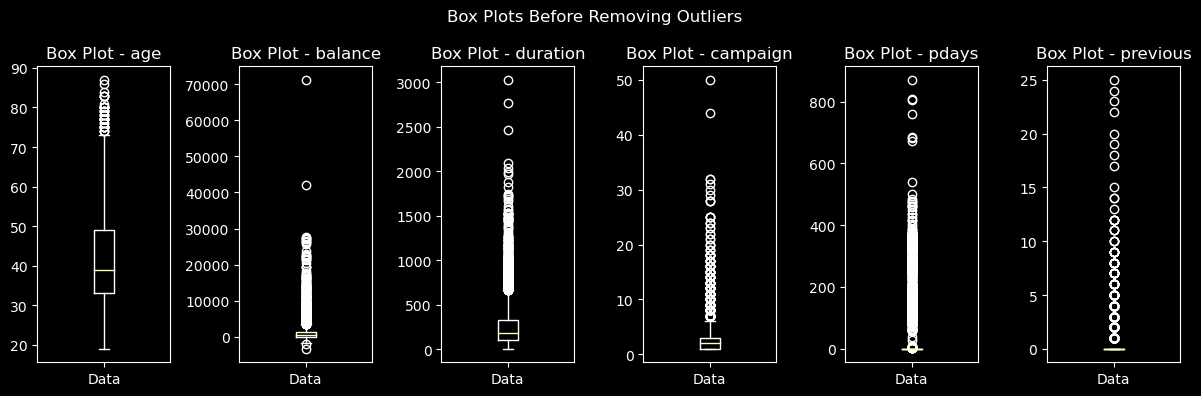

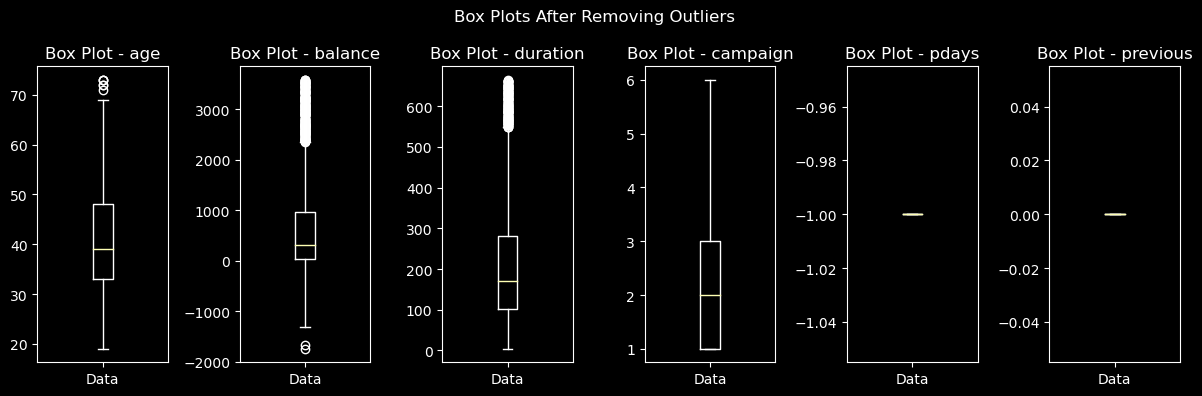

In [42]:
# plot
def plot_boxplots(data, column_names, title):
    plt.figure(figsize=(12, 4))
    for i, column in enumerate(column_names, 1):
        plt.subplot(1, len(column_names), i)
        plt.boxplot(data[column])
        plt.title(f'Box Plot - {column}')
        plt.xticks([1], ['Data'])

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Specify the numeric columns you want to check for outliers
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot box plots before removing outliers
plot_boxplots(bank, numeric_columns, 'Box Plots Before Removing Outliers')

def remove_outliers_iqr(df, column_names):
    outliers_removed = df.copy()
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect and remove outliers
        outliers_removed = outliers_removed[(outliers_removed[column] >= lower_bound) &
                                              (outliers_removed[column] <= upper_bound)]

    return outliers_removed

# Detect and remove outliers
data_no_outliers = remove_outliers_iqr(bank, numeric_columns)

# Plot box plots after removing outliers
plot_boxplots(data_no_outliers, numeric_columns, 'Box Plots After Removing Outliers')


#### Removing outliers

## Exploratory Data Analysis

### Univariate Analysis

This is analysis of one attribute

### Bivariate Analysis

### Multivariate Analysis